# Mass Change
**Description:**  Ice sheet height and thickness changes from ICESat to ICECast-2.

Choose the data to plot by passing a string to `version` with the format "ais_VERSION_TYPE" where  VERSION is "dhdt" for total thickness change or "dmdt" for corrected for firn-air content. 

TYPE is "floating" or "grounded".

Optionally add "_filt" to retrieve a filtered version of the data.

**Datasets:** 

N.A.

**Associated papers:** 

Smith, B., Helen A. Fricker, Alex S. Gardner, Brooke Medley, Johan Nilsson, Fernando S. Paolo, Nicholas Holschuh, et al. “Pervasive Ice Sheet Mass Loss Reflects Competing Ocean and Atmosphere Processes.” Science, April 30, 2020, eaaz5845. https://doi.org/10.1126/science.aaz5845.


In [3]:
%%capture
%load_ext autoreload
%autoreload 2

import itertools

from polartoolkit import fetch, maps, regions

In [18]:
versions = ["dhdt", "dmdt"]
types = ["floating", "grounded"]
filts = ["", "_filt"]

combos = list(itertools.product(*[versions, types, filts]))

version_names = [f"ais_{s[0]}_{s[1]}{s[2]}" for s in combos]


grids = []
for name in version_names:
    data = fetch.mass_change(
        version=name,
        # available options
        # region,
        # spacing,
        # registration ("g" for gridline or "p" for pixel),
    )
    grids.append(data)
    print(name)

ais_dhdt_floating
ais_dhdt_floating_filt
ais_dhdt_grounded
ais_dhdt_grounded_filt
ais_dmdt_floating
ais_dmdt_floating_filt
ais_dmdt_grounded
ais_dmdt_grounded_filt


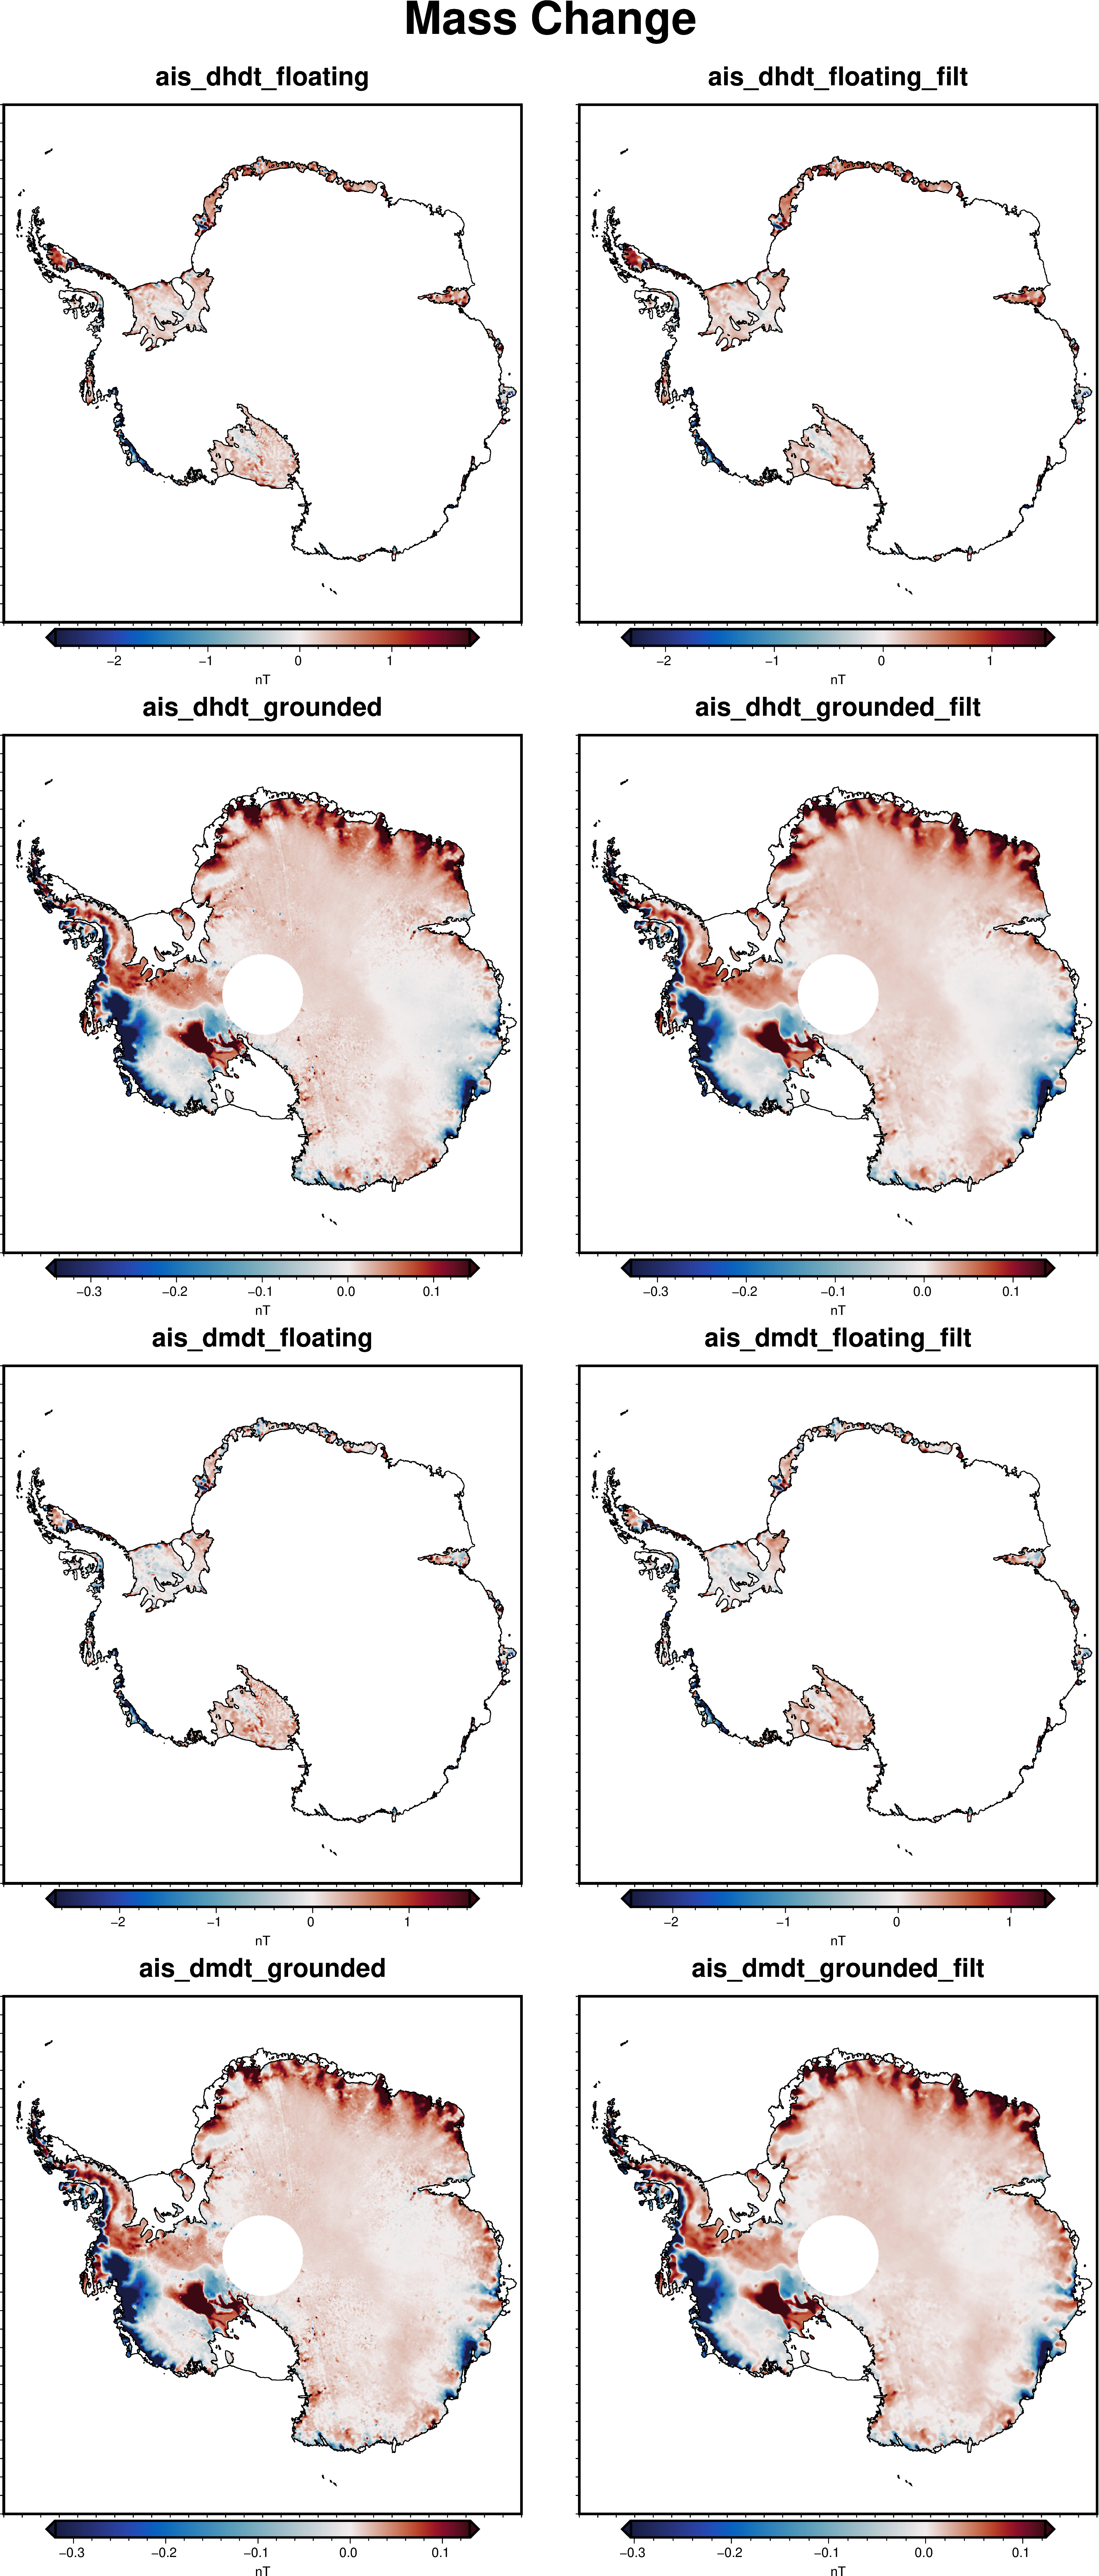

In [26]:
fig = maps.subplots(
    grids,
    region=regions.antarctica,
    dims=(int(len(grids) / 2), 2),
    fig_title="Mass Change",
    subplot_titles=version_names,
    cbar_labels=["nT" for x in grids],
    margins=".5c/1.3c",
    coast=True,
    cmaps=["balance+h0" for x in grids],
    hemisphere="south",
    robust=True,
)
fig.show()